### Compile Dataset into pickle file

In [4]:
from PIL import Image
import numpy as np
import os
import glob
import pickle
import matplotlib.pyplot as plt

In [5]:
def load_dataset(mypath) :
    data = []
    for fname in os.listdir(mypath):
        pathname = os.path.join(mypath, fname)
        #img = Image.open(pathname)
        #data.append(img)
        with Image.open(pathname) as img:
            img2 = np.array(img)
            data.append(img2)
    return data

In [24]:
dataset_dir = os.path.abspath('./data')
dataset_dir
mypaths=[os.path.dirname(dataset_dir + "/PolygonImagesV7/3/image_0.png"),
         os.path.dirname(dataset_dir + "/PolygonImagesV7/4/image_20000.png"),
         os.path.dirname(dataset_dir + "/PolygonImagesV7/5/image_40000.png")]
dataset = []
for mypath in mypaths:
    tempdata = load_dataset(mypath)
    data = np.array(tempdata)
    np.random.shuffle(data)
    dataset.append(data)

In [77]:
# split dataset into train validatin and test sets.
train_x = np.concatenate((dataset[0][:12000], dataset[1][:12000], dataset[2][:12000]), axis=0)
val_x = np.concatenate((dataset[0][12000:16000], dataset[1][12000:16000], dataset[2][12000:16000]), axis=0)
test_x = np.concatenate((dataset[0][16000:20000], dataset[1][16000:20000], dataset[2][16000:20000]), axis=0)

train_y = np.concatenate(( np.zeros(int(len(train_x)/len(mypaths))) , np.ones(int(len(train_x)/len(mypaths))) , 2*np.ones(int(len(train_x)/len(mypaths))) ) , axis=0)
val_y = np.concatenate(( np.zeros(int(len(val_x)/len(mypaths))) , np.ones(int(len(val_x)/len(mypaths))) , 2*np.ones(int(len(val_x)/len(mypaths))) ) , axis=0)
test_y = np.concatenate(( np.zeros(int(len(test_x)/len(mypaths))) , np.ones(int(len(test_x)/len(mypaths))) , 2*np.ones(int(len(test_x)/len(mypaths))) ) , axis=0)

# could use glob. think about it

In [78]:
del (data, dataset, tempdata, mypath, mypaths, Image, glob, load_dataset, np, os, pickle, plt)

In [80]:
whos

Variable   Type       Data/Info
-------------------------------
dill       module     <module 'dill' from 'C:\\<...>ages\\dill\\__init__.py'>
filename   str        PolygonImagesV7.pkl
test_x     ndarray    12000x45x45: 24300000 elems, type `uint8`, 24300000 bytes (23.174285888671875 Mb)
test_y     ndarray    12000: 12000 elems, type `float64`, 96000 bytes
train_x    ndarray    36000x45x45: 72900000 elems, type `uint8`, 72900000 bytes (69.52285766601562 Mb)
train_y    ndarray    36000: 36000 elems, type `float64`, 288000 bytes (281.25 kb)
val_x      ndarray    12000x45x45: 24300000 elems, type `uint8`, 24300000 bytes (23.174285888671875 Mb)
val_y      ndarray    12000: 12000 elems, type `float64`, 96000 bytes


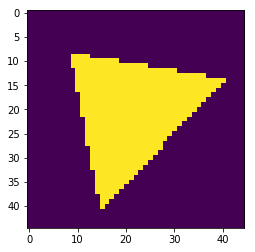

In [70]:
plt.imshow(dataset[0][0])
plt.show()

In [79]:
import dill
filename = 'PolygonImagesV7.pkl'
dill.dump_session(filename)

In [ ]:
# alternative pickle - Not in use.
import pickle

with open('PolygonImagesV3', 'wb') as f:
    pickle.dump(train_x, f)
    pickle.dump(val_x, f)
    pickle.dump(test_x, f)
    pickle.dump(train_y, f)
    pickle.dump(val_y, f)
    pickle.dump(test_y, f)
    
# for pickle above, you could use below to load.
import pickle

def load(filename):
    with open(filename, "rb") as f:
        while True:
            try:
                yield pickle.load(f)
            except EOFError:
                break

items = load(myfilename)

In [ ]:
# Someone else's example didn't use it.

from PIL import Image
from numpy import genfromtxt
import gzip, cPickle
import pickle
from glob import glob
import numpy as np
import pandas as pd

def dir_to_dataset(glob_files, loc_train_labels=""):
    print("Gonna process:\n\t %s"%glob_files)
    dataset = []
    for file_count, file_name in enumerate( sorted(glob(glob_files),key=len) ):
        print file_name
        print 'Are we in the loop ?'
        image = Image.open(file_name)
        img = Image.open(file_name).convert('LA') #tograyscale
        pixels = [f[0] for f in list(img.getdata())]
        dataset.append(pixels)
        if file_count % 10== 0:
            print("\t %s files processed"%file_count)
    # outfile = glob_files+"out"
    # np.save(outfile, dataset)
    if len(loc_train_labels) > 0:
        df = pd.read_csv(loc_train_labels)
        return np.array(dataset), np.array(df["Class"])
    else:
        return np.array(dataset)




Dataa, y = dir_to_dataset("image\\*.bmp","trainLabels.csv") #change to *.bmp
# Data and labels are read 

train_set_x = Dataa[:30]
val_set_x = Dataa[31:40]
test_set_x = Dataa[41:50]
train_set_y = y[:30]
val_set_y = y[31:40]
test_set_y = y[41:50]
# Divided dataset into 3 parts. I had 6281 images.

train_set = train_set_x, train_set_y
print 'Type of train_set_x',type(train_set_x)
print train_set_x
val_set = val_set_x, val_set_y
test_set = test_set_x, val_set_y

dataset = [train_set, val_set, test_set]

f = gzip.open('traffic_file.pkl.gz','wb')
pickle.dump(dataset, f, protocol=2)
f.close()